In [24]:
import sys
import os
import importlib
import geopandas as gpd
import statistics
import time

# In order to use our local edited versions of open_cp
# scripts, we insert the parent directory of the current
# file ("..") at the start of our sys.path here.
sys.path.insert(0, os.path.abspath(".."))

# Elements from PredictCode's custom "open_cp" package
import open_cp
import open_cp.knox

#import riskModelsGeneric
#importlib.reload(riskModelsGeneric)
import knoxAnalysis
importlib.reload(knoxAnalysis)
from knoxAnalysis import make_knox_info_file, make_graphs_from_knox_file

Some default arguments for Chicago data

In [3]:

# Location of data file
datadir = "../../Data"

# Input csv file name
in_csv_file_name = "chi_all_s_BURGLARY_RES_010101_190101_stdXY.csv"

# Output file for Knox info
knox_file_name = "knoxtestingB.txt"

# Geojson file
geojson_file_name = "Chicago_South_Side_2790.geojson"

crime_types = "BURGLARY"

num_knox_iterations = 200

#sbin in meters
knox_sbin_size = 100
knox_sbin_num = 10
#tbin in days
knox_tbin_size = 7
knox_tbin_num = 8

# Date in format YYYY-MM-DD
first_test_end = "2017-05-01"
time_window_size = "4M"
time_step = "1M"
num_experiments = 4

# CSV formatting parameters
# If Chicago data:
csv_date_format = "%m/%d/%Y %I:%M:%S %p"
csv_longlat = False
csv_epsg = None
csv_infeet = True
csv_has_header = True

Some default arguments for Fantasy Durham data

In [25]:

# Location of data file
datadir = "../../Data"

# Input csv file name
in_csv_file_name = "Fantasy-Durham-Data_std.csv"

# Output file for Knox info
knoxrun_file_name = "knoxtestingFD2.txt"

# Geojson file
geojson_file_name = "Durham_27700.geojson"

crime_types = "Burglary, Vehicle crime"

num_knox_iterations = 200

#sbin in meters
knox_sbin_size = 200
knox_sbin_num = 10
#tbin in days
knox_tbin_size = 7
knox_tbin_num = 4

# Date in format YYYY-MM-DD
first_test_end = "2019-09-01"
time_window_size = "1M"
time_step = "1W"
num_experiments = 1

# CSV formatting parameters
# If Fantasy Durham data:
csv_date_format = "%d/%m/%Y"
csv_longlat = True
csv_epsg = 27700
csv_infeet = False
csv_has_header = True

In [26]:
# Perform Knox runs and generate file of resulting Knox info


make_knox_info_file(datadir=datadir, 
                    in_csv_file_name=in_csv_file_name, 
                    out_knox_file_name=knoxrun_file_name, 
                    geojson_file_name=geojson_file_name, 
                    crime_types=crime_types, 
                    num_knox_iterations=num_knox_iterations, 
                    knox_sbin_size=knox_sbin_size, 
                    knox_sbin_num=knox_sbin_num, 
                    knox_tbin_size=knox_tbin_size, 
                    knox_tbin_num=knox_tbin_num, 
                    earliest_exp_time=first_test_end, 
                    num_exp=num_experiments, 
                    time_step=time_step, 
                    time_len=time_window_size, 
                    csv_date_format = csv_date_format, 
                    csv_longlat = csv_longlat, 
                    csv_epsg = csv_epsg, 
                    csv_infeet = csv_infeet, 
                    csv_has_header = csv_has_header, 
                    )



First time window is from 2019-08-01 to 2019-09-01
About to make date_range...
date_range: ['2019-08-01']
outfile: ..\..\Data\knoxtestingFD2.txt
Successfully obtained data, with 1777 events.
Opening file ..\..\Data\knoxtestingFD2.txt for writing.
Time span: 2019-08-01 to 2019-09-01
Getting data subset...
...Got data subset. (0.0020)
Number of events in timespan: 650
Calculating Knox...
...Calculated Knox. (6.0677)
Writing to file ..\..\Data\knoxtestingFD2.txt ...
...Wrote to file. (0.0030)
Time for this run: 6.0737
Number of runs: 1
Number of bins per run: 40
Overall time: 6.0737


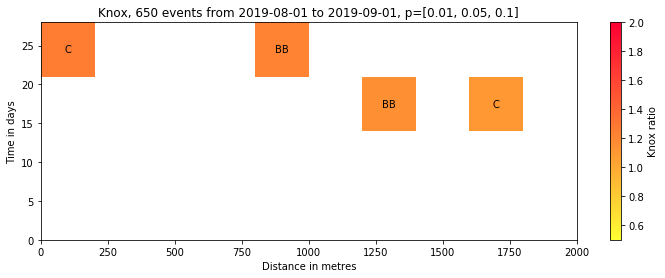

In [27]:
#Analyse output

# Input parameters
datadir = "../../Data"
# Significance bands we're interested in
signif_cutoff = [0.01, 0.05, 0.1]
# Whether you want to generate scatterplots that attempt to pick the best
#  spatial and temporal bandwidths, in a few different ways
graph_best_bands = True

make_graphs_from_knox_file(datadir, 
                           knoxrun_file_name, 
                           signif_cutoff=signif_cutoff)
